In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# ========================================
# 경로 설정 (여기를 수정하세요)
# ========================================
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/7주/cifar10_data'  # CIFAR-10 데이터를 저장할 경로

# 데이터 디렉토리 생성
os.makedirs(DATA_DIR, exist_ok=True)

# --- CIFAR-10 로드 (자동으로 캐싱) ---
# Keras는 기본적으로 ~/.keras/datasets에 저장하지만,
# 명시적으로 경로를 지정하려면 아래와 같이 처리
cifar10_path = os.path.join(DATA_DIR,'cifar-10-batches-py')

if os.path.exists(cifar10_path):
    print(f"✓ 기존 데이터 발견: {cifar10_path}")
    print("저장된 데이터를 로드합니다...")
else:
    print(f"데이터가 없습니다. {DATA_DIR}에 다운로드합니다...")

# 데이터 로드 (없으면 자동 다운로드 후 캐싱)
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"✓ 데이터 로드 완료")
print(f"  - 학습 데이터: {x_train.shape}")
print(f"  - 테스트 데이터: {x_test.shape}\n")



데이터가 없습니다. /content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/7주/cifar10_data에 다운로드합니다...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
✓ 데이터 로드 완료
  - 학습 데이터: (50000, 32, 32, 3)
  - 테스트 데이터: (10000, 32, 32, 3)



In [3]:
# 클래스 이름 정의
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# 사용할 클래스 선택
selected_classes = ['cat','dog','horse']
selected_idx = [class_names.index(c)for c in selected_classes]

# --- 해당 클래스만 필터링 ---
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

print(f"선택된 클래스: {selected_classes}")
print(f"  - 학습 샘플 수: {len(x_train)}")
print(f"  - 테스트 샘플 수: {len(x_test)}\n")

# 라벨 0~2로 매핑
label_map = {v: i for i, v in enumerate(selected_idx)}
y_train = np.array([label_map[int(y)] for y in y_train])
y_test  = np.array([label_map[int(y)] for y in y_test])

# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

선택된 클래스: ['cat', 'dog', 'horse']
  - 학습 샘플 수: 15000
  - 테스트 샘플 수: 3000



/tmp/ipython-input-452830120.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)] for y in y_train])
/tmp/ipython-input-452830120.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test  = np.array([label_map[int(y)] for y in y_test])


In [8]:
# CNN 모델 구성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [9]:
# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# 학습
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
106/106 - 8s - 73ms/step - accuracy: 0.4975 - loss: 0.9583 - val_accuracy: 0.5807 - val_loss: 0.8691
Epoch 2/10
106/106 - 1s - 7ms/step - accuracy: 0.6124 - loss: 0.8129 - val_accuracy: 0.6193 - val_loss: 0.7929
Epoch 3/10
106/106 - 1s - 6ms/step - accuracy: 0.6614 - loss: 0.7338 - val_accuracy: 0.6587 - val_loss: 0.7459
Epoch 4/10
106/106 - 1s - 6ms/step - accuracy: 0.6887 - loss: 0.6880 - val_accuracy: 0.6847 - val_loss: 0.7111
Epoch 5/10
106/106 - 1s - 6ms/step - accuracy: 0.7137 - loss: 0.6344 - val_accuracy: 0.7307 - val_loss: 0.6371
Epoch 6/10
106/106 - 1s - 6ms/step - accuracy: 0.7338 - loss: 0.6049 - val_accuracy: 0.7293 - val_loss: 0.6196
Epoch 7/10
106/106 - 1s - 6ms/step - accuracy: 0.7500 - loss: 0.5723 - val_accuracy: 0.7220 - val_loss: 0.6219
Epoch 8/10
106/106 - 1s - 6ms/step - accuracy: 0.7683 - loss: 0.5401 - val_accuracy: 0.7407 - val_loss: 0.6065
Epoch 9/10
106/106 - 1s - 6ms/step - accuracy: 0.7793 - loss: 0.5149 - val_accuracy: 0.7533 - val_loss: 0.5787


In [11]:
# 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nCNN Test Accuracy: {test_acc:.4f}")

94/94 - 1s - 15ms/step - accuracy: 0.7600 - loss: 0.5788

CNN Test Accuracy: 0.7600


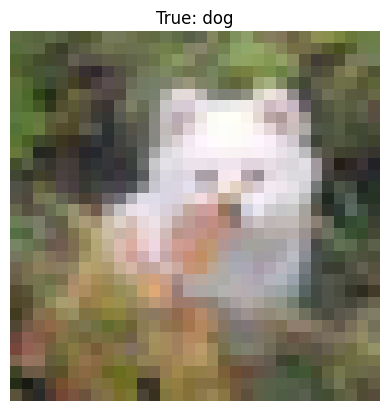

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted: dog


In [18]:
# 클래스 이름
selected_classes = ['cat','dog','horse']

# 테스트용 이미지 하나 선택
idx = np.random.randint(0, len(x_test))
img = x_test[idx]
true_label = y_test[idx]

# 이미지 시각화
plt.imshow(img)
plt.title(f"True: {selected_classes[true_label]}")
plt.axis('off')
plt.show()

# 예측
pred_prob = model.predict(img[np.newaxis, ...])  # 배치 차원 추가
pred_class = np.argmax(pred_prob)
print(f"Predicted: {selected_classes[pred_class]}")
